*** Proyecto de Predicción de Ventas de Vehículos ***

Se seleccionó un conjunto de datos "kaggle" el cual contiene información de la venta de vehículos, contando con columnas como:
-Data - fecha de la venta
-Price - precio del vehículo
-Model, Company - Modelo y Marca de Vehículo
Y como datos del comprador los valores en las columnas:
-Annual_Income - Ingresos Anuales
-Gender -- Género
Entre otros datos
El archivo se encuentra con un formato ".csv", contando con más de 1000 filas
Enlace de la fuente de datos: https://www.kaggle.com/datasets/missionjee/car-sales-report

Observaciones:
- El conjunto de datos muestra un mayor número de compradores masculinos que femeninos, pero con una media de gasto cercana, el tipo de vehículo mayormente comprados son SUV.
- El promedio de los vehículos comprados por el género femenino en cada mes es más estable en un rango de precio que en el conjunto masculino que tiene a variar mucho más.
- La región que tuvo un mayor monto es Austin en cada uno de los años del conjunto de datos.

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt      
from plotly.subplots import make_subplots 
import plotly.graph_objects as go    

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [510]:
#carga de informacion 
df = pd.read_csv('../resources/CarSales-car_data.csv')

In [511]:
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [512]:
df.tail()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [513]:
df.shape

(23906, 16)

In [514]:
df.columns

Index(['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price', 'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [515]:
df.dtypes

Car_id           object
Date             object
Customer_Name    object
Gender           object
Annual_Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price             int64
Dealer_No        object
Body_Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [516]:
df.describe()

,Annual_Income,Price,Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [517]:
df.nunique()

Car_id           23906
Date               612
Customer_Name     3021
Gender               2
Annual_Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price              870
Dealer_No            7
Body_Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [518]:
df.isnull().sum()

Car_id           0
Date             0
Customer_Name    1
Gender           0
Annual_Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price            0
Dealer_No        0
Body_Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [519]:
for index, row in df.iterrows():
    if pd.isna(row['Customer_Name']):
        print(f"Fila {index}: {row['Car_id']}")
#Verifico que index es la del dato vacio pero al ser un dato que no afecta la estadistica no lo manipulo

Fila 7564: C_CND_007565


In [520]:
#Verificacion de Datos duplicados
#para mantener integridad del df original generamos uno nuevo para eliminar la informacion duplicada
df1=df.copy()
duplicados=df1.duplicated().sum()
print(f"Cantidad de duplicados: {duplicados}")
if duplicados>0 :
    df1 = df1.drop_duplicates()

Cantidad de duplicados: 0


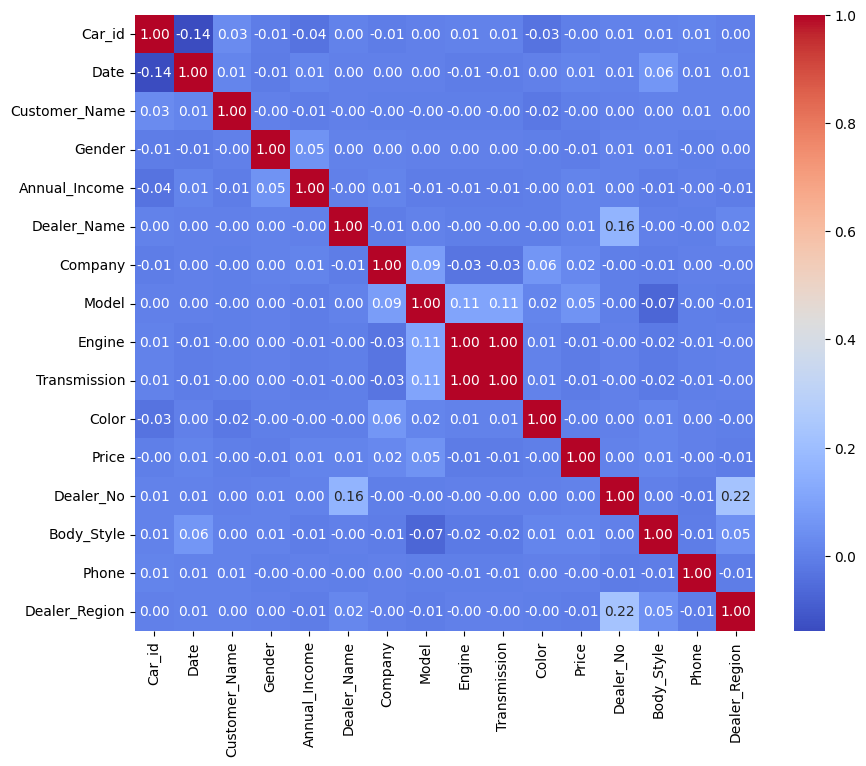

In [521]:
df_correlacion=df.copy()
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [522]:
#cambio de tipos de datos
df1['Phone'] = df1['Phone'].astype('category')
df1['Customer_Name'] = df1['Customer_Name'].astype('category')
df1['Gender'] = df1['Gender'].astype('category')
df1['Engine'] = df1['Engine'].astype('category')
df1['Dealer_Name'] = df1['Dealer_Name'].astype('category')
df1['Company'] = df1['Company'].astype('category')
df1['Model'] = df1['Model'].astype('category')
df1['Transmission'] = df1['Transmission'].astype('category')
df1['Color'] = df1['Color'].astype('category')
df1['Body_Style'] = df1['Body_Style'].astype('category')
df1['Dealer_Region'] = df1['Dealer_Region'].astype('category')

df1['Car_id'] = df1['Car_id'].astype('category')
df1['Date'] = pd.to_datetime(df1['Date'])
    #.dt.strftime('%d/%m/%Y')
df1['Dealer_No'] = df1['Dealer_No'].astype('category')

df1.dtypes

Car_id                 category
Date             datetime64[ns]
Customer_Name          category
Gender                 category
Annual_Income             int64
Dealer_Name            category
Company                category
Model                  category
Engine                 category
Transmission           category
Color                  category
Price                     int64
Dealer_No              category
Body_Style             category
Phone                  category
Dealer_Region          category
dtype: object

In [523]:
#El tipo de vehiculo con mas ventas
conteo_Body_Style = df1['Body_Style'].value_counts()
print(conteo_Body_Style)


Body_Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [524]:

x_bodyStyle = conteo_Body_Style.index.tolist()
y_bodyStyle = conteo_Body_Style.values

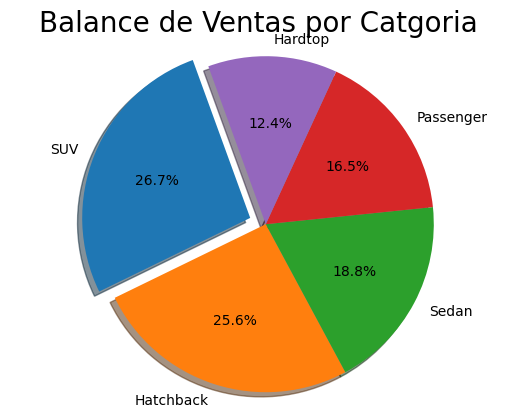

In [525]:
explode = (0.1, 0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y_bodyStyle, explode=explode, labels=x_bodyStyle, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('Balance de Ventas por Catgoria',fontsize=20)
plt.show()

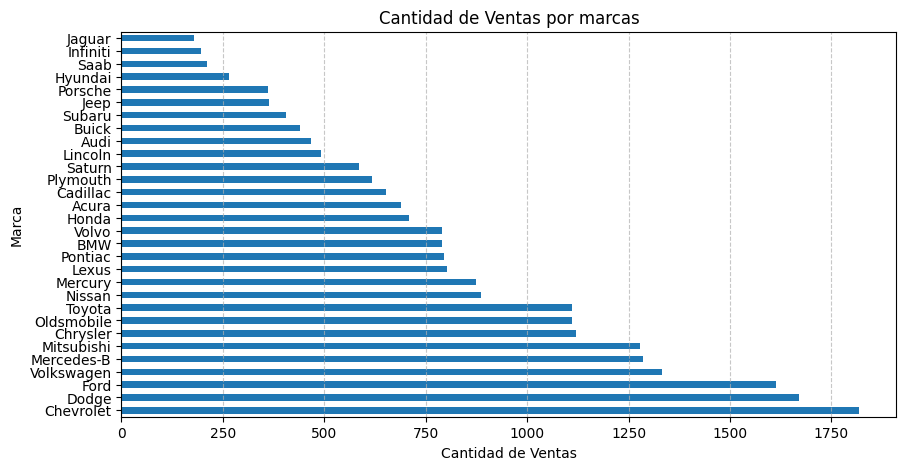

In [526]:
#El tipo de vehiculo con mas ventas
conteo_Company = df1['Company'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10,5))
conteo_Company.plot(kind='barh'	)
plt.title('Cantidad de Ventas por marcas')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Marca')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [527]:
df1.dtypes

Car_id                 category
Date             datetime64[ns]
Customer_Name          category
Gender                 category
Annual_Income             int64
Dealer_Name            category
Company                category
Model                  category
Engine                 category
Transmission           category
Color                  category
Price                     int64
Dealer_No              category
Body_Style             category
Phone                  category
Dealer_Region          category
dtype: object

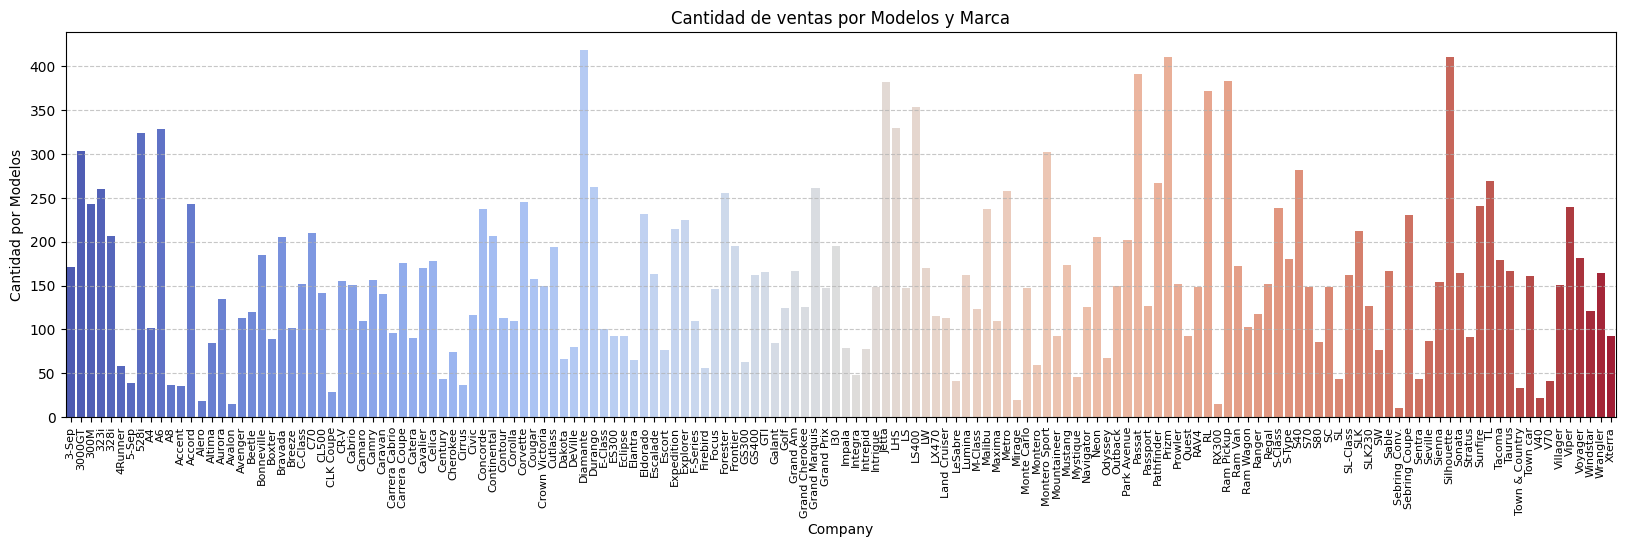

In [528]:
suma_ventas = df1.groupby('Company')['Model'].count()

# Crear el gráfico
plt.figure(figsize=(20, 5))
sns.countplot(data=df1, x='Model', palette='coolwarm')
plt.xlabel('Company')
plt.ylabel('Cantidad por Modelos')
plt.xticks(rotation=90,fontsize=8)
plt.title('Cantidad de ventas por Modelos y Marca')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

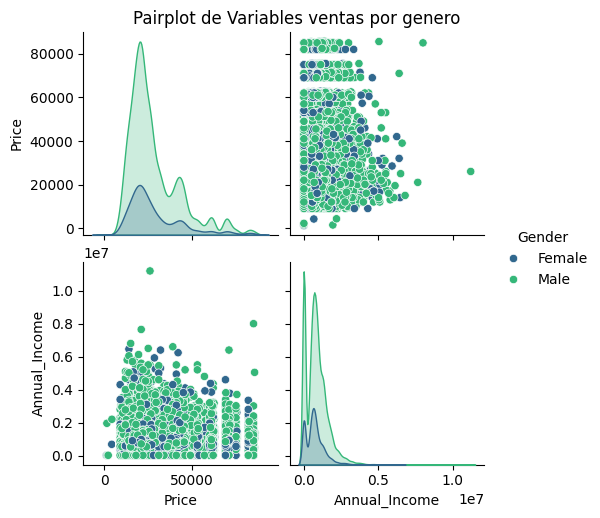

In [529]:
# Pairplot para algunas variables
sns.pairplot(df1[['Price','Annual_Income','Gender']], hue='Gender', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot de Variables ventas por genero', y=1.02)
plt.show()

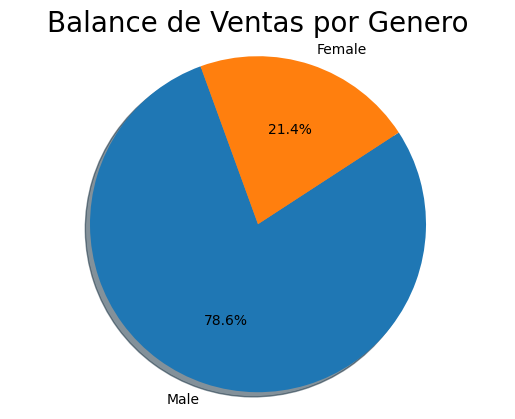

In [530]:
conteo_Gender = df1['Gender'].value_counts()
x_Gender = conteo_Gender.index.tolist()
y_Gender = conteo_Gender.values

#explode = (0.1, 0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y_Gender, labels=x_Gender, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('Balance de Ventas por Genero',fontsize=20)
plt.show()


Gender
Female    144440271
Male      527085194
Name: Price, dtype: int64


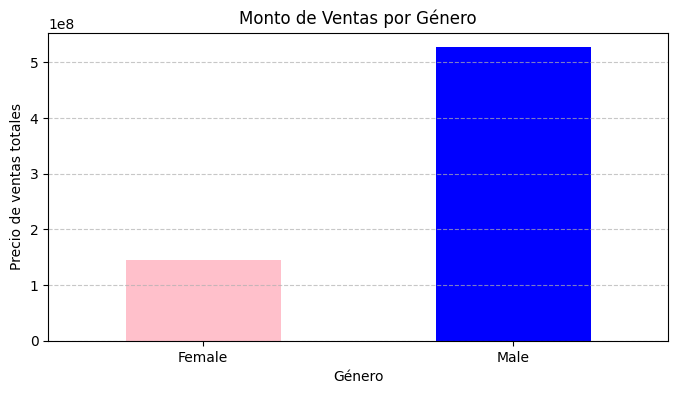

In [531]:
#Calculo total de ingreso
ingresos_por_genero = df1.groupby('Gender')['Price'].sum()
print(ingresos_por_genero)
# Crear el gráfico de barras
plt.figure(figsize=(8,4))
ingresos_por_genero.plot(kind='bar', color=['pink','blue'])
plt.title('Monto de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Precio de ventas totales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gender
Female    28277.265270
Male      28039.429407
Name: Price, dtype: float64


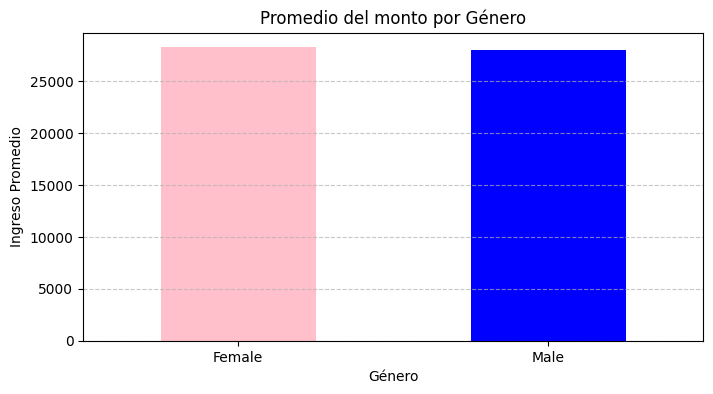

In [532]:
#Calculo de la media
ingresos_por_genero = df1.groupby('Gender')['Price'].mean()
print(ingresos_por_genero)
# Crear el gráfico de barras
plt.figure(figsize=(8,4))
ingresos_por_genero.plot(kind='bar', color=['pink','blue'])
plt.title('Promedio del monto por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [533]:
#grafico que refleja los meses que se vendieron los vehiculos con mayor costo
df1['Mes_year'] = df1['Date'].dt.to_period('M')


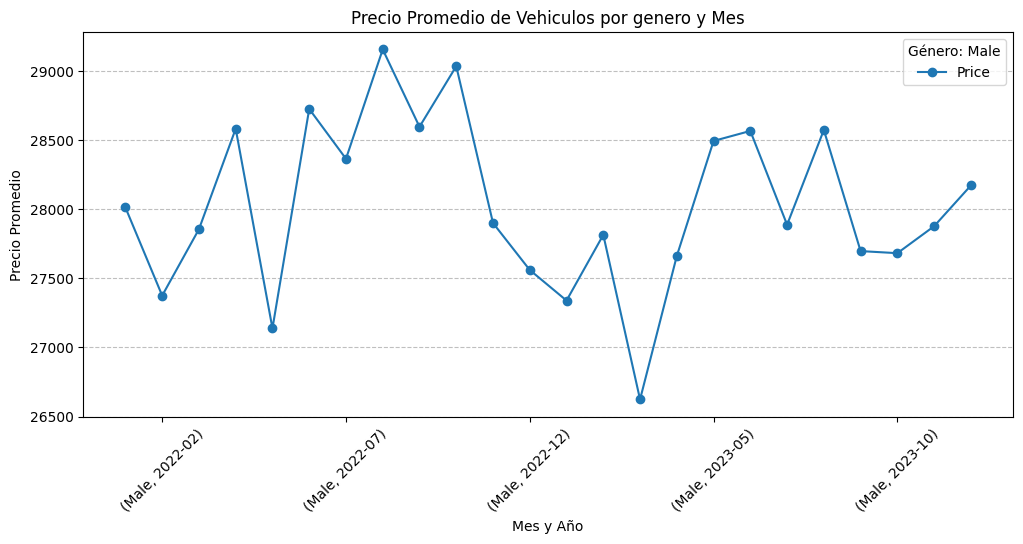

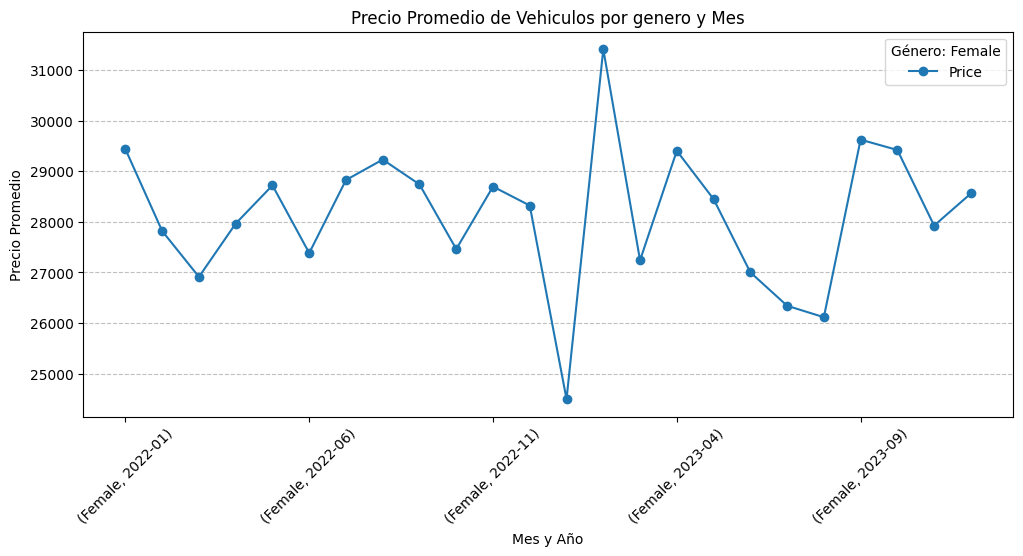

In [534]:
for genero in df1['Gender'].unique():
    plt.figure(figsize=(12,5))
    #Filtrado y agrupado de la informacion
    df_genero = df1[df1['Gender'] == genero]
    df_grouped_price_fetch_gender = df_genero.groupby(['Gender', 'Mes_year'])['Price'].mean()
    
    df_grouped_price_fetch_gender.plot(kind='line', marker='o')
    plt.title(f'Precio Promedio de Vehiculos por genero y Mes')
    plt.xlabel('Mes y Año')
    plt.ylabel('Precio Promedio')
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    plt.legend(title=f'Género: {genero}')
    plt.xticks(rotation=45)
    plt.show()

In [535]:
#Agrupacion de ventas por Año de cada sucursal
df1['year'] = df1['Date'].dt.to_period('Y')
agrupadoY_Dealer_Name_monto = df1.groupby(['year', 'Dealer_Name'])['Price'].sum().unstack()
#print(agrupadoY_Dealer_Name_monto)

<Figure size 1000x600 with 0 Axes>

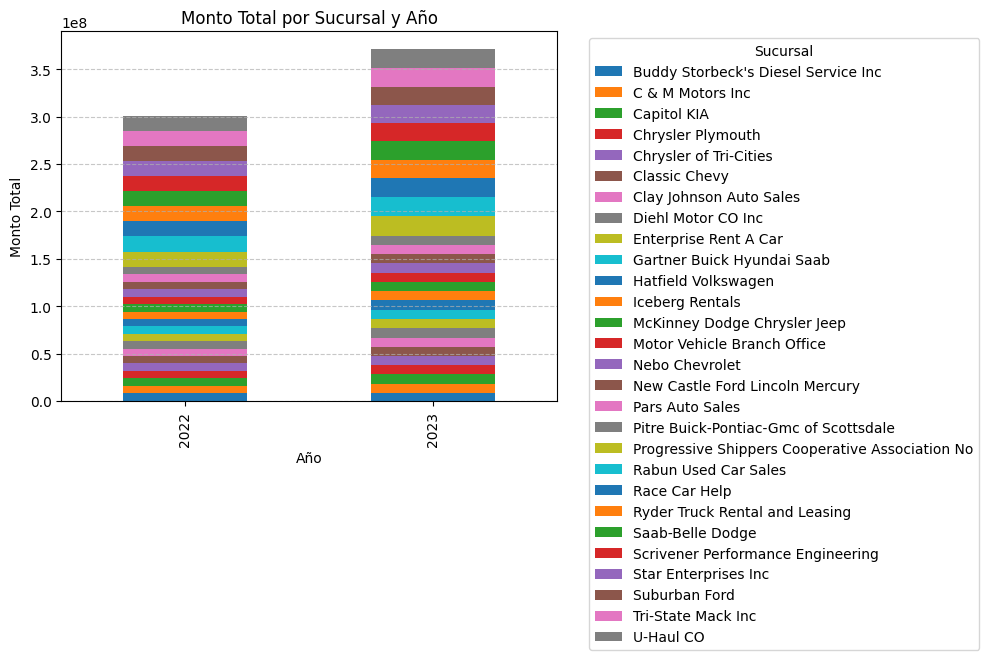

In [536]:
plt.figure(figsize=(10,6))
agrupadoY_Dealer_Name_monto.plot(kind='bar', stacked=True)
plt.title('Monto Total por Sucursal y Año')
plt.xlabel('Año')
plt.ylabel('Monto Total')
plt.legend(title='Sucursal',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [537]:
df2=df1.copy()
#df2['Mes'] = df['Date'].dt.month

In [538]:

unwanted=['Car_id', 'Date', 'Customer_Name', 'Gender',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region','Mes_year','year']
df2.drop(labels=unwanted,axis=1,inplace=True)
df2.dtypes


Annual_Income    int64
Price            int64
dtype: object

In [539]:
df2.corr()

,Annual_Income,Price
Annual_Income,1.000000,0.012065
Price,0.012065,1.000000


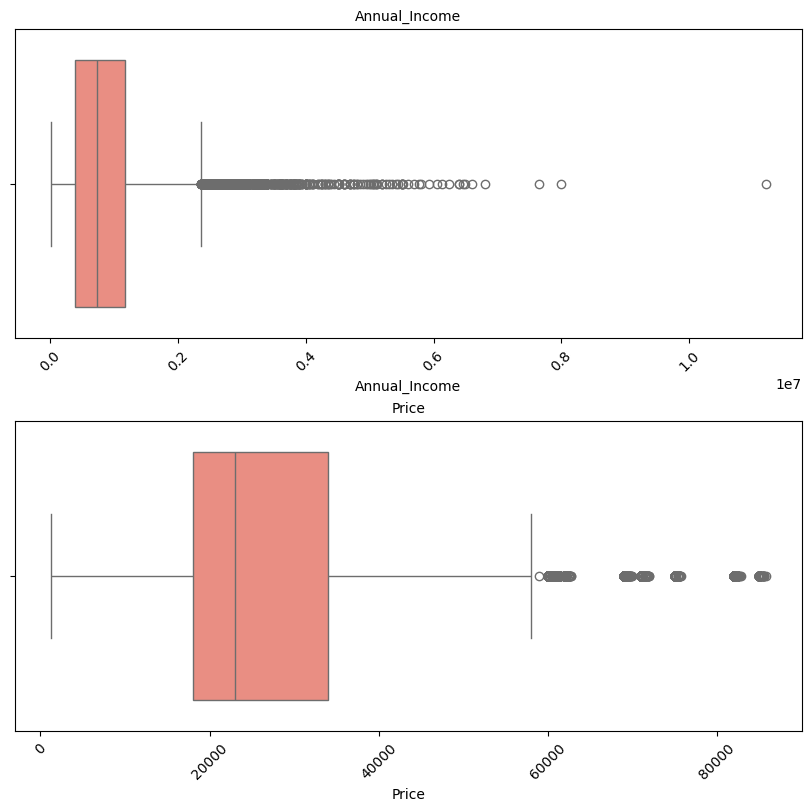

In [540]:
numerical_col = df2.select_dtypes(include='number').columns
len(numerical_col)

# Ajustar tamaño total de la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), constrained_layout=True)

# Ajustar márgenes y espaciado interno
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.5)

# Dibujar boxplots y mejorar visibilidad
for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(data=df1, x=column, ax=ax, color='salmon')
    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas si fueran categóricas

# Mostrar la figura
plt.show()

In [541]:
df2.max(numeric_only=True)

Annual_Income    11200000
Price               85800
dtype: int64

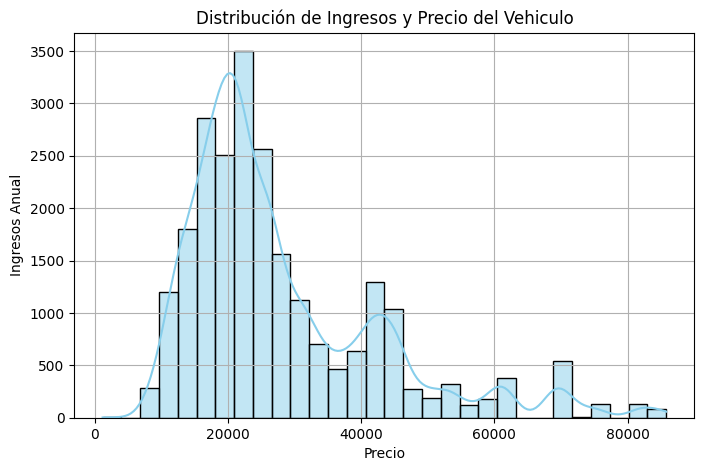

In [542]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df2, x='Price', kde=True, bins=30, color='skyblue')
plt.title('Distribución de Ingresos y Precio del Vehiculo')
plt.xlabel('Precio')
plt.ylabel('Ingresos Anual')
plt.grid(True)
plt.show()

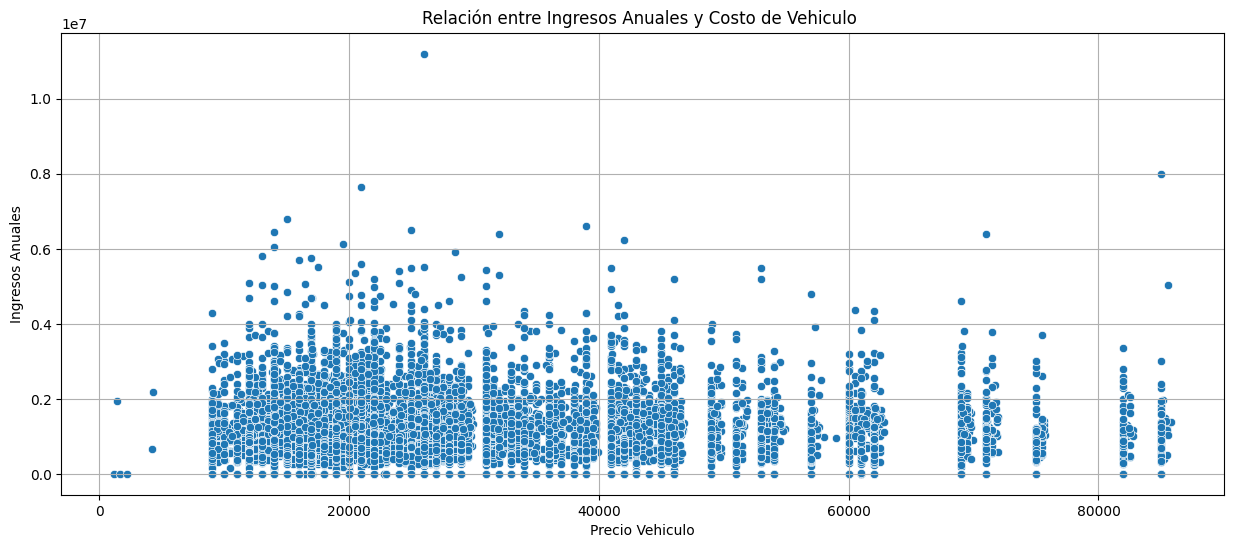

In [543]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Price', y='Annual_Income')
plt.title('Relación entre Ingresos Anuales y Costo de Vehiculo ')
plt.xlabel('Precio Vehiculo')
plt.ylabel('Ingresos Anuales')
plt.grid(True)
plt.show()

Dealer_Region
Aurora         88687382
Austin        117192531
Greenville     88149602
Janesville    106351234
Middletown     87134628
Pasco          88040714
Scottsdale     95969374
Name: Price, dtype: int64


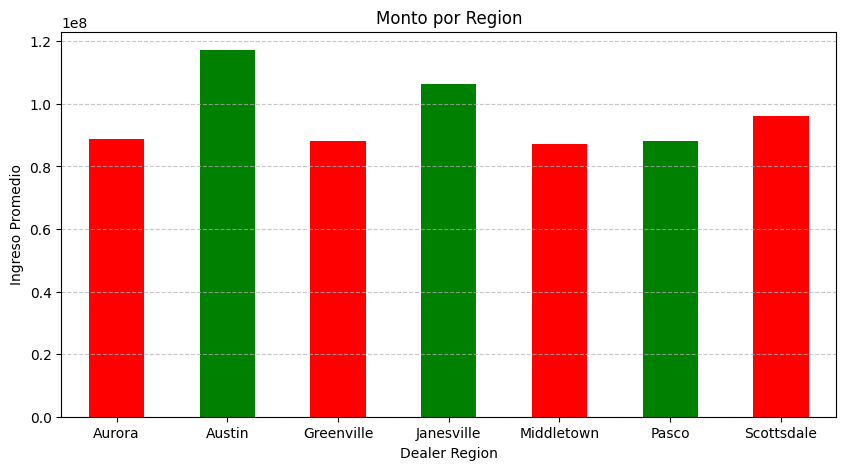

In [544]:
#Calculo de ingresos por Region
ingresos_por_region_promedio = df1.groupby('Dealer_Region')['Price'].sum()
print(ingresos_por_region_promedio)
# Crear el gráfico de barras
plt.figure(figsize=(10,5))
ingresos_por_region_promedio.plot(kind='bar', color=['red', 'green'])
plt.title('Monto por Region')
plt.xlabel('Dealer Region')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dealer_Region  year
Aurora         2022    39495080
               2023    49192302
Austin         2022    52156341
               2023    65036190
Greenville     2022    39266339
               2023    48883263
Janesville     2022    47621652
               2023    58729582
Middletown     2022    39568152
               2023    47566476
Pasco          2022    39676798
               2023    48363916
Scottsdale     2022    42555983
               2023    53413391
Name: Price, dtype: int64


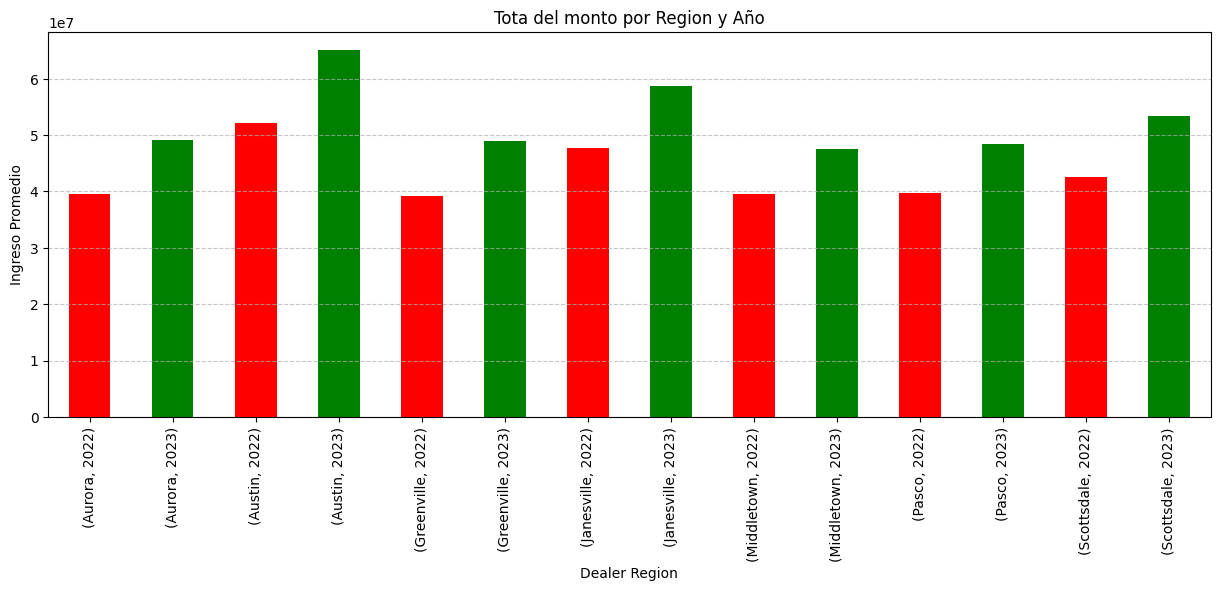

In [545]:
#Calculo del total por Region y periodo Anual
ingresos_por_region = df1.groupby(['Dealer_Region','year'])['Price'].sum()
print(ingresos_por_region)
# Crear el gráfico de lineal
plt.figure(figsize=(15,5))
ingresos_por_region.plot(kind='bar',color=['red', 'green'])
plt.title('Tota del monto por Region y Año')
plt.xlabel('Dealer Region')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()